# Transfer Learning

### Imports

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
import os
import numpy as np

### Data

In [3]:
data_transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [5]:
import requests, zipfile
from io import BytesIO

url = 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'

req = requests.get(url)
file = zipfile.ZipFile(BytesIO(req.content))
file.extractall('./data')

In [6]:
data_dir = './data/hymenoptera_data'
# Store the images in a dictionary
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transform[x]) for x in ['train', 'val']}
# Create the dataloaders
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
# Store the dataset sizes
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
# Store the class names
class_names = image_datasets['train'].classes
print(class_names)
print(dataset_sizes)

['ants', 'bees']
{'train': 244, 'val': 153}


### Visualization

In [8]:
import matplotlib.pyplot as plt

def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0)) # transpose to (H, W, C)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title:
        plt.title(title)
    plt.pause(0.001)

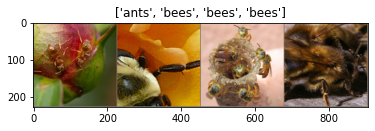

In [9]:
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs) # make a grid of images from a batch
imshow(out, title=[class_names[x] for x in classes])

### Model

In [11]:
# Load ResNet18
model_conv = models.resnet18(weights='DEFAULT')